#Bibliotecas

In [1]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import sqlite3
from google.colab import files
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc
from scipy.stats import kruskal

#Alterar a linguagem

In [2]:
#pacote para identificar o encoding da base de dados
!pip install chardet

-Base Candidatos

In [3]:
#identificando o encoding e a linguagem da base de dados
import chardet

with open('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_2024/consulta_cand_2024_SP.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000)) # Read a portion of the file

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [4]:
#visualização da base de dados
!head -n 25 '/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_2024/consulta_cand_2024_SP.csv' | tail -n 5

"27/08/2024";"19:30:34";2024;2;"ELEI��O ORDIN�RIA";1;619;"Elei��es Municipais 2024";"06/10/2024";"MUNICIPAL";"SP";"67130";"MOGI DAS CRUZES";13;"VEREADOR";250001997507;10789;"MARTA VITORINO JANU�RIO";"MARTINHA";"#NULO#";"-4";"N�O DIVULG�VEL";-3;"#NE";"PARTIDO ISOLADO";10;"REPUBLICANOS";"REPUBLICANOS";-1;"#NULO#";"#NULO#";"#NULO#";250001706184;"PARTIDO ISOLADO";"REPUBLICANOS - REPUBLICANOS - MOGI DAS CRUZES - SP";"SP";"09/05/1962";"031083510108";4;"FEMININO";6;"ENSINO M�DIO COMPLETO";1;"SOLTEIRO(A)";"01";"BRANCA";298;"SERVIDOR P�BLICO MUNICIPAL";-1;"#NULO#"
"27/08/2024";"19:30:34";2024;2;"ELEI��O ORDIN�RIA";1;619;"Elei��es Municipais 2024";"06/10/2024";"MUNICIPAL";"SP";"69213";"PRAIA GRANDE";13;"VEREADOR";250002318218;20333;"JOAO BENEDITO ALVES MAGALHAES";"JO�O MAGALHAES";"#NULO#";"-4";"N�O DIVULG�VEL";-3;"#NE";"PARTIDO ISOLADO";20;"PODE";"PODEMOS";-1;"#NULO#";"#NULO#";"#NULO#";250001754918;"PARTIDO ISOLADO";"Podemos - PODE - PRAIA GRANDE - SP";"CE";"12/04/1955";"042346480779";2;"MASCULI

In [5]:
#Substituir ";"
# 'on_bad_lines' indica o que fazer em linhas com erros
# 'skip' irá pular linhas que causam erros.
candidato = pd.read_csv('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_2024/consulta_cand_2024_SP.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

-Base Complemento

In [6]:
#identificando o encoding e a linguagem da base de dados
import chardet

with open('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_complementar_2024/consulta_cand_complementar_2024_SP.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000)) # Read a portion of the file

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [7]:
#visualização da base de dados
!head -n 25 '/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_complementar_2024/consulta_cand_complementar_2024_SP.csv' | tail -n 5

"27/08/2024";"19:30:34";2024;619;250002023453;-3;"#NE";1;"BRASILEIRA NATA";-3;"MAIRINQUE";"37";"N";-1;"#NULO#";"53179.07";"N";"S";"-1";"06004589120246260131";"-3";"#NE";"-3";"#NE";"N�O";"#NULO#";-1;"#NULO#";"N";"N";-1;-1;"2024-08-08 14:54:46";8;"AGUARDANDO JULGAMENTO";"-1";"#NULO#";"-1";"#NULO#";-1;"#NULO#";-1;"#NULO#";-1;"#NULO#"
"27/08/2024";"19:30:34";2024;619;250002013157;-3;"#NE";1;"BRASILEIRA NATA";-3;"PRESIDENTE EPIT�CIO";"25";"N";-1;"#NULO#";"38659.48";"N";"S";"-1";"06001237420246260195";"-3";"#NE";"-3";"#NE";"N�O";"#NULO#";-1;"#NULO#";"N";"N";-1;-1;"2024-08-08 11:28:01";8;"AGUARDANDO JULGAMENTO";"-1";"#NULO#";"-1";"#NULO#";-1;"#NULO#";-1;"#NULO#";-1;"#NULO#"
"27/08/2024";"19:30:34";2024;619;250002257538;-3;"#NE";1;"BRASILEIRA NATA";-3;"ITAPETININGA";"34";"N";0;"N�O INFORMADO";"15985.08";"N";"N";"-1";"06003226920246260010";"-3";"#NE";"-3";"#NE";"N�O";"#NULO#";-1;"#NULO#";"N";"N";-1;-1;"2024-08-14 11:04:24";8;"AGUARDANDO JULGAMENTO";"-1";"#NULO#";"-1";"#NULO#";-1;"#NULO#";-1;"#N

In [8]:
#Substituir ";"
# 'on_bad_lines' indica o que fazer em linhas com erros
# 'skip' irá pular linhas que causam erros.
complemento = pd.read_csv('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_complementar_2024/consulta_cand_complementar_2024_SP.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

#Análise Descritiva da Base de Dados

-Base Candidato

In [9]:
#Verificar as colunas na base de dados
candidato.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [10]:
#verificar as 5 primeiras linhas da base de dados candidato
candidato.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,27/08/2024,19:30:34,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,278,VEREADOR,-1,#NULO#
1,27/08/2024,19:30:34,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,243,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,-1,#NULO#
2,27/08/2024,19:30:34,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,999,OUTROS,-1,#NULO#
3,27/08/2024,19:30:34,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,-1,#NULO#
4,27/08/2024,19:30:34,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,257,EMPRESÁRIO,-1,#NULO#


In [11]:
#Verificar nulos na base candidato
candidato.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
CD_TIPO_ELEICAO,0
NM_TIPO_ELEICAO,0
NR_TURNO,0
CD_ELEICAO,0
DS_ELEICAO,0
DT_ELEICAO,0
TP_ABRANGENCIA_ELEICAO,0


In [12]:
#Quantidade de linhas
candidato.shape

(77591, 50)

In [13]:
candidato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77591 entries, 0 to 77590
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     77591 non-null  object
 1   HH_GERACAO                     77591 non-null  object
 2   ANO_ELEICAO                    77591 non-null  int64 
 3   CD_TIPO_ELEICAO                77591 non-null  int64 
 4   NM_TIPO_ELEICAO                77591 non-null  object
 5   NR_TURNO                       77591 non-null  int64 
 6   CD_ELEICAO                     77591 non-null  int64 
 7   DS_ELEICAO                     77591 non-null  object
 8   DT_ELEICAO                     77591 non-null  object
 9   TP_ABRANGENCIA_ELEICAO         77591 non-null  object
 10  SG_UF                          77591 non-null  object
 11  SG_UE                          77591 non-null  int64 
 12  NM_UE                          77591 non-null  object
 13  C

In [14]:
# Lista das colunas que você deseja selecionar
colunas_selecionadas = [
    'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
    'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SG_UF_NASCIMENTO',
    'DT_NASCIMENTO', 'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO',
    'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL',
    'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO', 'DS_OCUPACAO'
]

# Selecionando as colunas do DataFrame 'candidatos'
candidatos = candidato[colunas_selecionadas]

# Exibir o DataFrame selecionado
print(candidatos)

      SG_UF  SG_UE                  NM_UE  CD_CARGO  DS_CARGO  SQ_CANDIDATO  \
0        SP  72230        VALENTIM GENTIL        13  VEREADOR  250002276626   
1        SP  64319       GABRIEL MONTEIRO        13  VEREADOR  250002275730   
2        SP  64319       GABRIEL MONTEIRO        13  VEREADOR  250002277051   
3        SP  72273             VALPARAÍSO        13  VEREADOR  250002279457   
4        SP  63118          CARAGUATATUBA        13  VEREADOR  250002275840   
...     ...    ...                    ...       ...       ...           ...   
77586    SP  62111               BARRINHA        13  VEREADOR  250001920422   
77587    SP  71498                 SUMARÉ        13  VEREADOR  250001942575   
77588    SP  64874                  IBATÉ        13  VEREADOR  250001946083   
77589    SP  71153          SÃO SEBASTIÃO        13  VEREADOR  250002341798   
77590    SP  70955  SÃO JOSÉ DO RIO PARDO        13  VEREADOR  250002346612   

       NR_CANDIDATO                                

In [15]:
#Salvar copia da base
candidato_backup = candidatos.copy()

-Base Complemento

In [16]:
# Verificar as colunas da base de dados
complemento.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_ELEICAO', 'SQ_CANDIDATO',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'CD_ETNIA_INDIGENA', 'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA',
       'NM_TIPO_DESTINACAO_VOTOS', 'CD_SITUACAO_CANDIDATO_TOT',
       'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
       'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA',
       'CD_SITUACAO_JULGAMENTO', 'DS_SITUACAO_JULGAMENTO',
       'CD_SITUACAO_JULGAMENTO_PLEITO', 'DS_SITUACAO_JULGAMENTO_PLEITO',
       'CD_SITUACAO_JULGAMENTO_

In [17]:
#verificar as 5 primeiras linhas da base de dados complemento
complemento.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_ELEICAO,SQ_CANDIDATO,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,CD_NACIONALIDADE,DS_NACIONALIDADE,CD_MUNICIPIO_NASCIMENTO,...,CD_SITUACAO_JULGAMENTO_PLEITO,DS_SITUACAO_JULGAMENTO_PLEITO,CD_SITUACAO_JULGAMENTO_URNA,DS_SITUACAO_JULGAMENTO_URNA,CD_SITUACAO_CASSACAO,DS_SITUACAO_CASSACAO,CD_SITUACAO_CASSACAO_MIDIA,DS_SITUACAO_CASSACAO_MIDIA,CD_SITUACAO_DIPLOMA,DS_SITUACAO_DIPLOMA
0,27/08/2024,19:30:34,2024,619,250001971482,-3,#NE,1,BRASILEIRA NATA,-3,...,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#
1,27/08/2024,19:30:34,2024,619,250001899774,-3,#NE,1,BRASILEIRA NATA,-3,...,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#
2,27/08/2024,19:30:34,2024,619,250002147813,-3,#NE,1,BRASILEIRA NATA,-3,...,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#
3,27/08/2024,19:30:34,2024,619,250001968946,-3,#NE,1,BRASILEIRA NATA,-3,...,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#
4,27/08/2024,19:30:34,2024,619,250001951792,-3,#NE,1,BRASILEIRA NATA,-3,...,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#,-1,#NULO#


In [18]:
#Verificar nulos na base de dados complemento
complemento.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
CD_ELEICAO,0
SQ_CANDIDATO,0
CD_DETALHE_SITUACAO_CAND,0
DS_DETALHE_SITUACAO_CAND,0
CD_NACIONALIDADE,0
DS_NACIONALIDADE,0
CD_MUNICIPIO_NASCIMENTO,0


In [19]:
#Quantidade de linhas
complemento.shape

(77591, 45)

In [20]:
# Lista das colunas que você deseja selecionar
colunas_selecionadas = [
'SQ_CANDIDATO', 'DS_NACIONALIDADE', 'NM_MUNICIPIO_NASCIMENTO',
'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO', 'ST_DECLARAR_BENS'
]

# Selecionando as colunas do DataFrame 'candidatos'
complementos = complemento[colunas_selecionadas]

# Exibir o DataFrame selecionado
print(complementos)

       SQ_CANDIDATO DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  \
0      250001971482  BRASILEIRA NATA               SÃO PAULO   
1      250001899774  BRASILEIRA NATA   SÃO JOSÉ DO RIO PRETO   
2      250002147813  BRASILEIRA NATA           PARIQUERA-AÇU   
3      250001968946  BRASILEIRA NATA              COSMÓPOLIS   
4      250001951792  BRASILEIRA NATA              CAFELÂNDIA   
...             ...              ...                     ...   
77586  250002166022  BRASILEIRA NATA                CAMPINAS   
77587  250002119312  BRASILEIRA NATA                SOROCABA   
77588  250002219506  BRASILEIRA NATA                PORECATU   
77589  250002347047  BRASILEIRA NATA   SÃO JOSÉ DO RIO PARDO   
77590  250002136036  BRASILEIRA NATA             SANTO ANDRÉ   

       NR_IDADE_DATA_POSSE ST_QUILOMBOLA  VR_DESPESA_MAX_CAMPANHA  \
0                       53             N                129911.43   
1                       41             N                 68181.85   
2                       

In [21]:
#Salvar copia da base
complemento_backup = complementos.copy()

- **JOIN** para unir as tabelas

In [22]:
# Renomear a coluna duplicada no DataFrame 'candidatos'
candidatos = candidatos.rename(columns={'SQ_CANDIDATO': 'SQ_CANDIDATO_Candidato'})
complementos = complementos.rename(columns={'SQ_CANDIDATO': 'SQ_CANDIDATO_Complemento'})

# Conexão com SQLite em memória
conn = sqlite3.connect(':memory:')

# Salvar os DataFrames como tabelas SQLite
candidatos.to_sql('candidato', conn, index=False)
complementos.to_sql('complemento', conn, index=False)

# Realizar o JOIN com as colunas renomeadas
eleicao = pd.read_sql_query('SELECT * FROM candidato JOIN complemento ON candidato.SQ_CANDIDATO_Candidato = complemento.SQ_CANDIDATO_Complemento', conn)

# Fechar a conexão
conn.close()

# Exibir o resultado
print(eleicao)

      SG_UF  SG_UE                  NM_UE  CD_CARGO  DS_CARGO  \
0        SP  72230        VALENTIM GENTIL        13  VEREADOR   
1        SP  64319       GABRIEL MONTEIRO        13  VEREADOR   
2        SP  64319       GABRIEL MONTEIRO        13  VEREADOR   
3        SP  72273             VALPARAÍSO        13  VEREADOR   
4        SP  63118          CARAGUATATUBA        13  VEREADOR   
...     ...    ...                    ...       ...       ...   
77586    SP  62111               BARRINHA        13  VEREADOR   
77587    SP  71498                 SUMARÉ        13  VEREADOR   
77588    SP  64874                  IBATÉ        13  VEREADOR   
77589    SP  71153          SÃO SEBASTIÃO        13  VEREADOR   
77590    SP  70955  SÃO JOSÉ DO RIO PARDO        13  VEREADOR   

       SQ_CANDIDATO_Candidato  NR_CANDIDATO  \
0                250002276626         43777   
1                250002275730         55555   
2                250002277051         10100   
3                250002279457  

In [23]:
#Verificar nulos na base de dados complemento
eleicao.isnull().sum()

,0
SG_UF,0
SG_UE,0
NM_UE,0
CD_CARGO,0
DS_CARGO,0
SQ_CANDIDATO_Candidato,0
NR_CANDIDATO,0
NM_CANDIDATO,0
NR_PARTIDO,0
SG_PARTIDO,0


- **Análise de Outliers**.
Identifiquei 10 candidatos com valores exorbitantes na base de dados (VR_DESPESA_MAX_CAMPANHA).

*R$67.276.114,50 (sessenta e sete milhões, duzentos e setenta e seis mil, cento e quatorze reais e cinquenta centavos)

In [24]:
# Filtrando os valores maiores que 10.000.000,00 (10 milhoes) na coluna VR_DESPESA_MAX_CAMPANHA
eleicoes_filtradas = eleicao[eleicao['VR_DESPESA_MAX_CAMPANHA'] >= 10000000.00]

# Exibindo o DataFrame filtrado
print(eleicoes_filtradas)

      SG_UF  SG_UE      NM_UE  CD_CARGO  DS_CARGO  SQ_CANDIDATO_Candidato  \
4177     SP  71072  SÃO PAULO        11  PREFEITO            250002098117   
9090     SP  71072  SÃO PAULO        11  PREFEITO            250001978066   
14305    SP  71072  SÃO PAULO        11  PREFEITO            250002180213   
38759    SP  71072  SÃO PAULO        11  PREFEITO            250002355541   
48452    SP  71072  SÃO PAULO        11  PREFEITO            250001884312   
51774    SP  71072  SÃO PAULO        11  PREFEITO            250002078851   
61624    SP  71072  SÃO PAULO        11  PREFEITO            250001926547   
64331    SP  71072  SÃO PAULO        11  PREFEITO            250002163891   
64458    SP  71072  SÃO PAULO        11  PREFEITO            250002031025   
72385    SP  71072  SÃO PAULO        11  PREFEITO            250002362195   

       NR_CANDIDATO                        NM_CANDIDATO  NR_PARTIDO  \
4177             15             RICARDO LUIS REIS NUNES          15   
9090      

- Notei que os dados acima não representam outliers, mas sim os valores reais de campanha dos atuais candidatos à prefeitura de São Paulo.

In [25]:
#salvar no csv
eleicao.to_csv('candidatosSP.csv', index=False)

#baixar arquivo csv
files.download('candidatosSP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualizações Gráficas 📉📈

   - **Distribuição de Gênero:** Analisar a proporção de candidatos por gênero (`CD_GENERO`, `DS_GENERO`).

In [26]:
#Visualizar os valores únicos na coluna DS_GENERO
eleicao['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [27]:
# Descrever estatísticas da coluna DS_GENERO
eleicao['DS_GENERO'].describe()

,DS_GENERO
count,77591
unique,2
top,MASCULINO
freq,51168


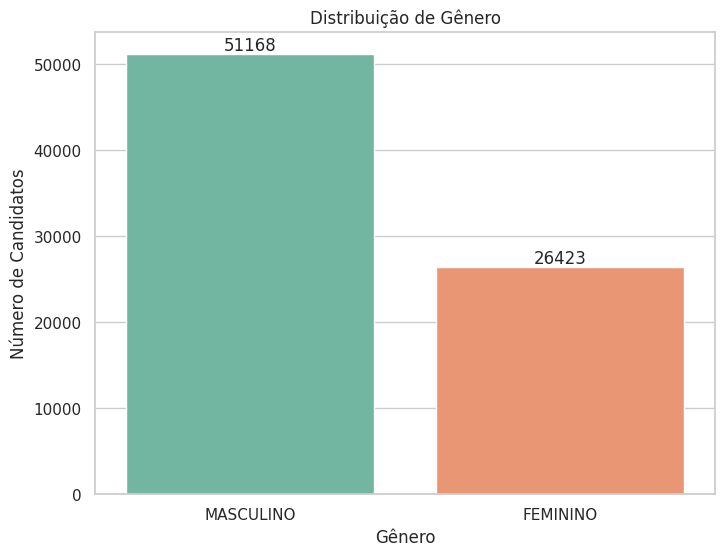

In [30]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Distribuição de Gênero
ax = sns.countplot(x='DS_GENERO', data=eleicao, palette='Set2', hue='DS_GENERO')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Candidatos')

# Adicionar rótulos às barras
for index, value in enumerate(eleicao['DS_GENERO'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar o gráfico
plt.show()

   - **Distribuição por Partido:** Avaliar a quantidade de candidatos por partido (`SG_PARTIDO`, `NM_PARTIDO`).

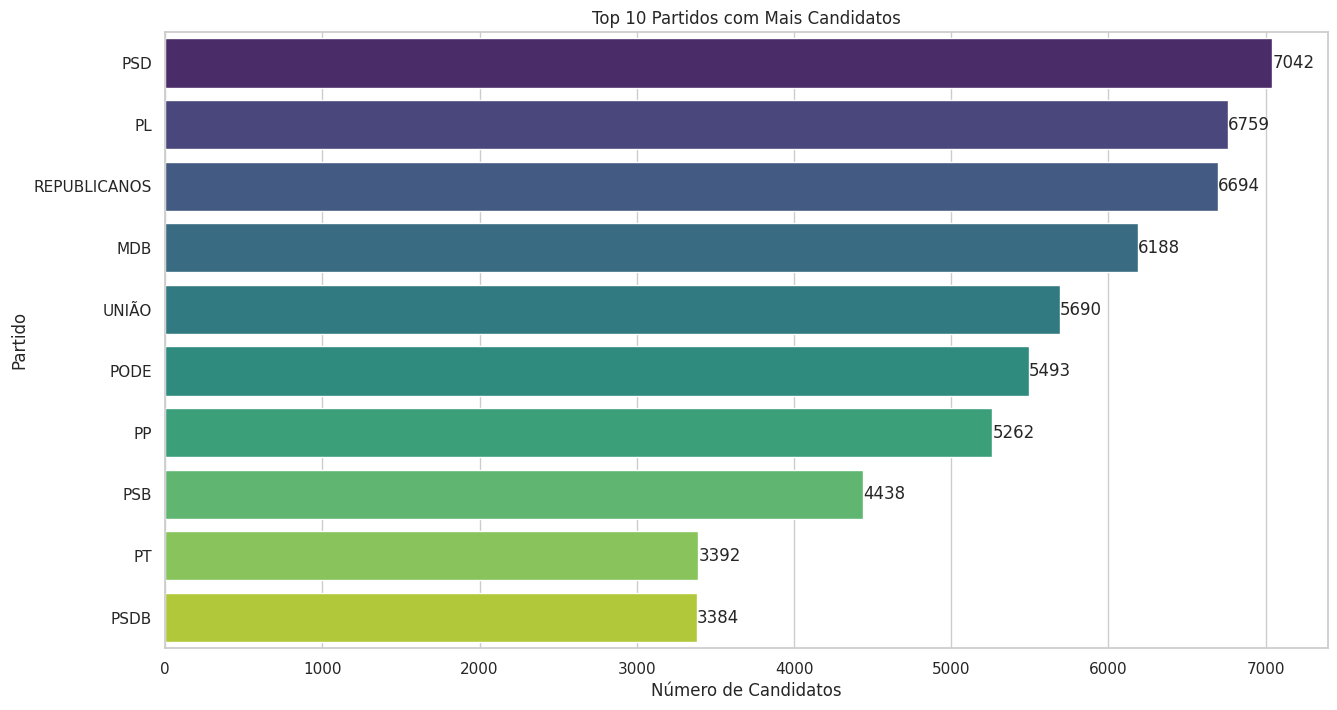

In [32]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Top 10 Partidos com Mais Candidatos
partido_count = eleicao['SG_PARTIDO'].value_counts().head(10)

# Convertendo para DataFrame para compatibilidade com o Seaborn
df_partidos = partido_count.reset_index()
df_partidos.columns = ['Partido', 'Número de Candidatos']

# Gerar a paleta de cores
palette = sns.color_palette('viridis', n_colors=len(df_partidos))

# Criar o gráfico
sns.barplot(x='Número de Candidatos', y='Partido', data=df_partidos, palette=palette, order=df_partidos['Partido'], hue='Partido')

# Adicionar rótulos às barras
for index, value in enumerate(df_partidos['Número de Candidatos']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title('Top 10 Partidos com Mais Candidatos')
plt.xlabel('Número de Candidatos')
plt.ylabel('Partido')

# Mostrar o gráfico
plt.show()

   - **Idade dos Candidatos:** Calcular a idade dos candidatos com base na data de nascimento (`DT_NASCIMENTO`) e analisar a distribuição de idades.

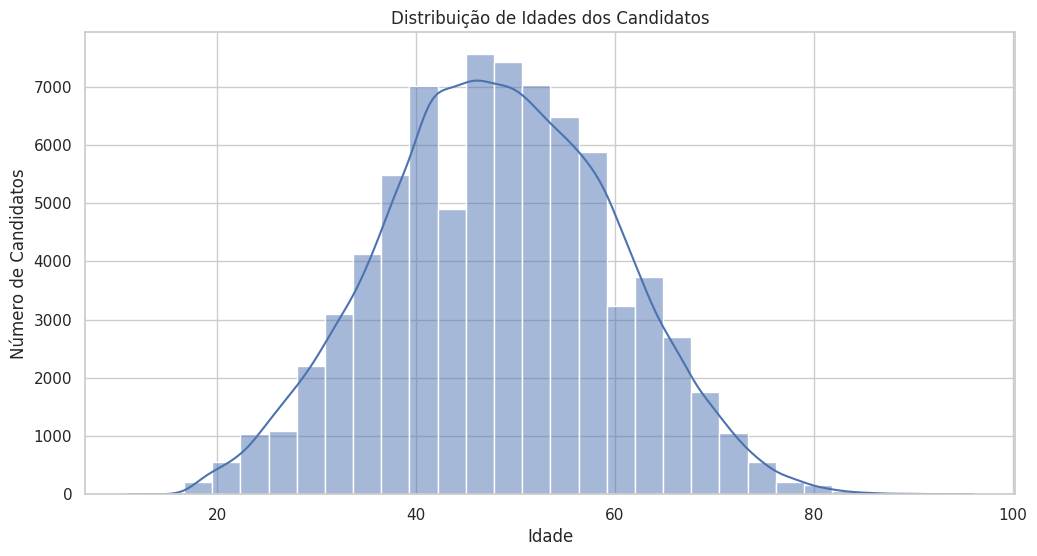

In [33]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Converter a coluna DT_NASCIMENTO para o formato de data
eleicao['DT_NASCIMENTO'] = pd.to_datetime(eleicao['DT_NASCIMENTO'], format='%d/%m/%Y')

# Função para calcular a idade
def calcular_idade(data_nascimento):
    hoje = datetime.today()
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

# Aplicar a função para calcular a idade
df['IDADE'] = eleicao['DT_NASCIMENTO'].apply(calcular_idade)

# Criar o gráfico de distribuição de idades - histograma
sns.histplot(df['IDADE'], bins=30, kde=True, color='b')

plt.title('Distribuição de Idades dos Candidatos')
plt.xlabel('Idade')
plt.ylabel('Número de Candidatos')

# Mostrar o gráfico
plt.show()

   - **Comparação por Escolaridade:** Comparar os candidatos com diferentes níveis de escolaridade (`CD_GRAU_INSTRUCAO`, `DS_GRAU_INSTRUCAO`).

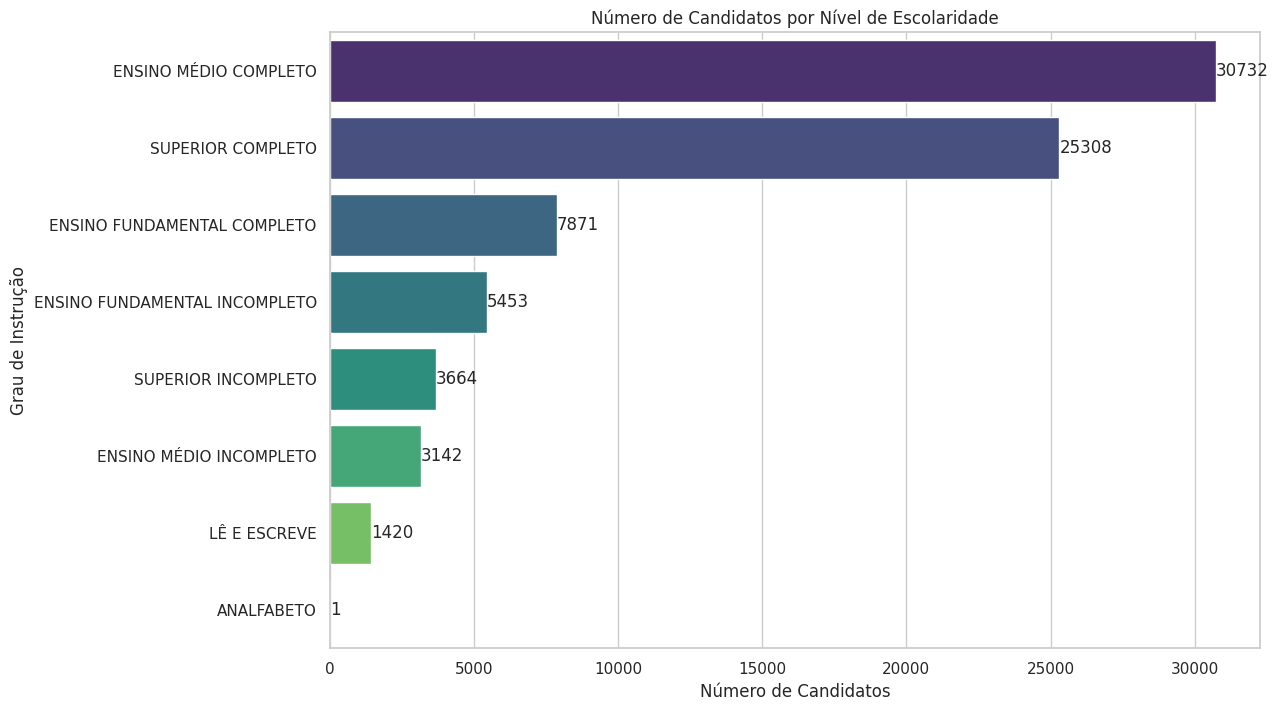

In [34]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Contar o número de candidatos por nível de escolaridade
escolaridade_count = eleicao['DS_GRAU_INSTRUCAO'].value_counts()

# Criar o DataFrame para o gráfico
df_escolaridade = escolaridade_count.reset_index()
df_escolaridade.columns = ['Grau de Instrução', 'Número de Candidatos']

# Criar o gráfico de barras
ax = sns.barplot(x='Número de Candidatos', y='Grau de Instrução', data=df_escolaridade, hue='Grau de Instrução', dodge=False, palette='viridis', legend=False)

plt.title('Número de Candidatos por Nível de Escolaridade')
plt.xlabel('Número de Candidatos')
plt.ylabel('Grau de Instrução')

# Adicionar rótulos às barras
for index, row in df_escolaridade.iterrows():
    ax.annotate(f"{row['Número de Candidatos']}", xy=(row['Número de Candidatos'], index), ha='left', va='center')

# Mostrar o gráfico
plt.show()

   - **Comparação por Estado Civil:** Analisar a relação entre estado civil ( `DS_ESTADO_CIVIL`) e outros atributos, como número de candidatos.

In [35]:
# Contar o número de candidatos por estado civil
estado_civil_count = eleicao['DS_ESTADO_CIVIL'].value_counts()

# Criar o DataFrame para o gráfico
df_estado_civil = estado_civil_count.reset_index()
df_estado_civil.columns = ['Estado Civil', 'Número de Candidatos']

# Criar o gráfico de barras
fig = px.bar(df_estado_civil, x='Número de Candidatos', y='Estado Civil', color='Estado Civil', title='Número de Candidatos por Estado Civil')
fig.update_layout(xaxis_title='Número de Candidatos', yaxis_title='Estado Civil')
fig.show()

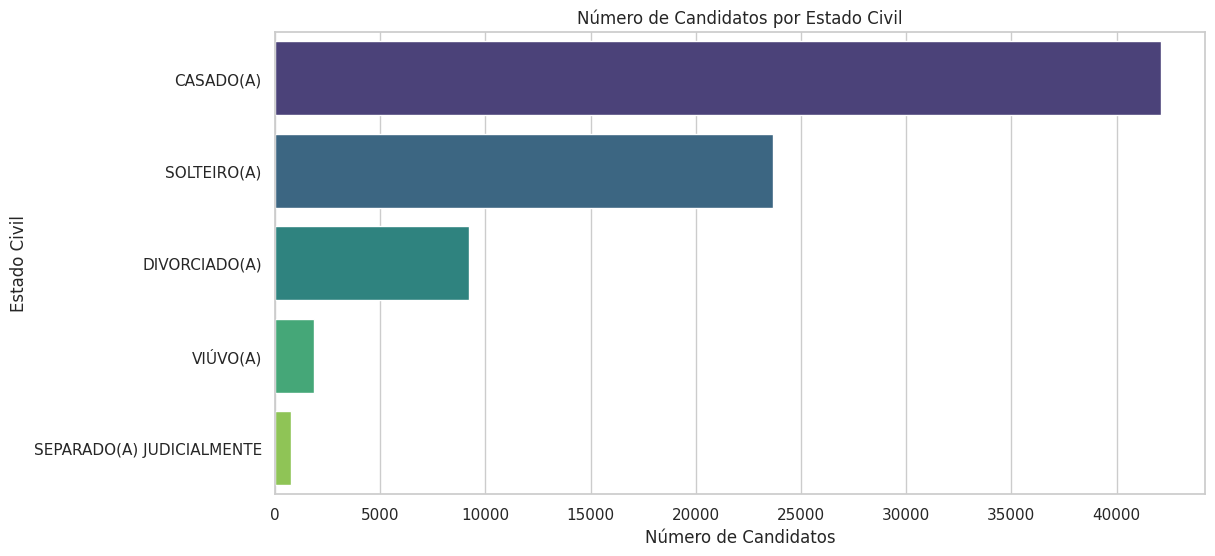

In [36]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Contar o número de candidatos por estado civil
estado_civil_count = eleicao['DS_ESTADO_CIVIL'].value_counts()

# Criar o DataFrame para o gráfico
df_estado_civil = estado_civil_count.reset_index()
df_estado_civil.columns = ['Estado Civil', 'Número de Candidatos']

# Criar o gráfico de barras
sns.barplot(x='Número de Candidatos', y='Estado Civil', data=df_estado_civil, hue='Estado Civil', dodge=False, palette='viridis', legend=False)

plt.title('Número de Candidatos por Estado Civil')
plt.xlabel('Número de Candidatos')
plt.ylabel('Estado Civil')

# Mostrar o gráfico
plt.show()

   - **Diversidade Racial:** Analisar a distribuição de candidatos por raça/cor (`CD_COR_RACA`, `DS_COR_RACA`).

In [37]:
# Contar o número de candidatos por raça/cor
cor_raca_count = eleicao['DS_COR_RACA'].value_counts()

# Criar o DataFrame para o gráfico
df_cor_raca = cor_raca_count.reset_index()
df_cor_raca.columns = ['Cor/Raça', 'Número de Candidatos']

# Criar o gráfico de barras com a plotly
fig = px.bar(df_cor_raca, x='Número de Candidatos', y='Cor/Raça', color='Cor/Raça', title='Número de Candidatos por Cor/Raça')
fig.update_layout(xaxis_title='Número de Candidatos', yaxis_title='Cor/Raça')
fig.show()

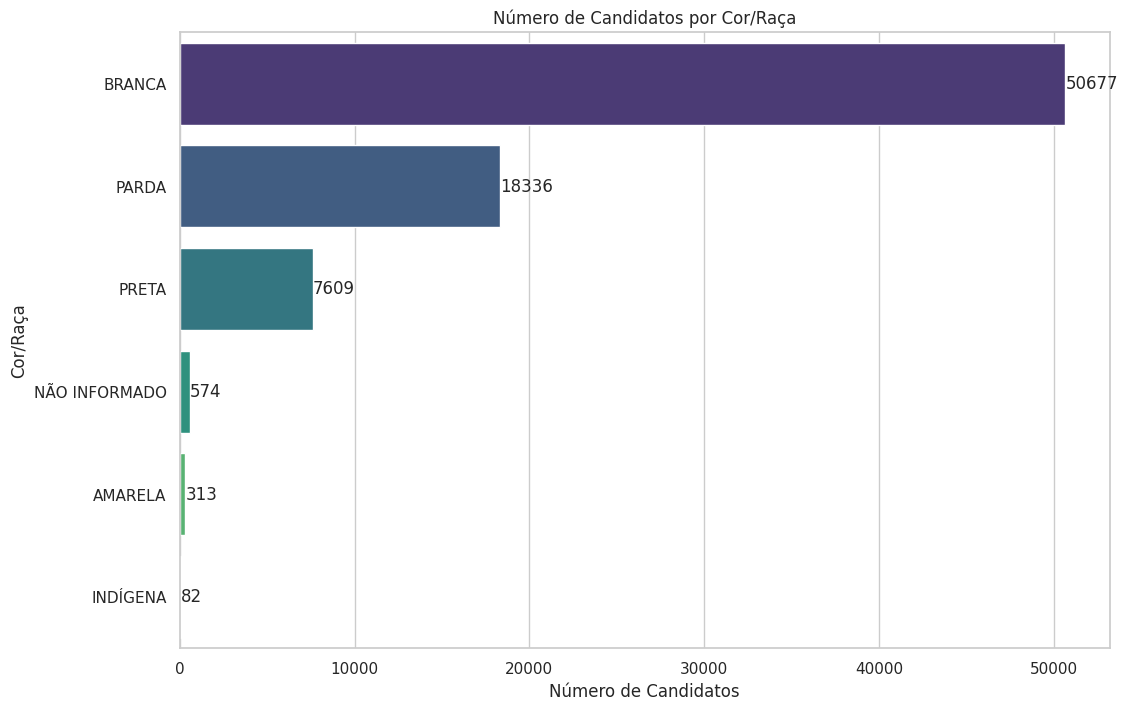

In [38]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Contar o número de candidatos por raça/cor
cor_raca_count = eleicao['DS_COR_RACA'].value_counts()

# Criar o DataFrame para o gráfico
df_cor_raca = cor_raca_count.reset_index()
df_cor_raca.columns = ['Cor/Raça', 'Número de Candidatos']

# Criar o gráfico de barras com matplotlib
ax = sns.barplot(x='Número de Candidatos', y='Cor/Raça', data=df_cor_raca, hue='Cor/Raça', dodge=False, palette='viridis', legend=False)

plt.title('Número de Candidatos por Cor/Raça')
plt.xlabel('Número de Candidatos')
plt.ylabel('Cor/Raça')

# Adicionar rótulos às barras
for index, row in df_cor_raca.iterrows():
    ax.annotate(f"{row['Número de Candidatos']}", xy=(row['Número de Candidatos'], index), ha='left', va='center')

# Mostrar o gráfico
plt.show()

   - **Diversidade por Ocupação:** Estudar as ocupações mais comuns entre os candidatos (`DS_OCUPACAO`).

In [39]:
# Carregar o arquivo CSV
df = pd.read_csv('/content/candidatosSP.csv')

# Contar o número de candidatos por ocupação
ocupacao_count = df['DS_OCUPACAO'].value_counts()

# Criar o DataFrame para a tabela
df_ocupacao = ocupacao_count.reset_index()
df_ocupacao.columns = ['Ocupação', 'Número de Candidatos']

# Ordenar a tabela em ordem decrescente de número de candidatos
df_ocupacao = df_ocupacao.sort_values(by='Número de Candidatos', ascending=False)

# Exibir a tabela
print(df_ocupacao)

                                 Ocupação  Número de Candidatos
0                                  OUTROS                 19192
1                              EMPRESÁRIO                  6699
2              SERVIDOR PÚBLICO MUNICIPAL                  5943
3                             COMERCIANTE                  3965
4    APOSENTADO (EXCETO SERVIDOR PÚBLICO)                  3936
..                                    ...                   ...
233                            ARQUEÓLOGO                     1
232                   JOALHEIRO E OURIVES                     1
230                            MAGISTRADO                     1
229                    MINISTRO DE ESTADO                     1
239                             GEOFÍSICO                     1

[240 rows x 2 columns]


In [40]:
# Configurações para mostrar a tabela inteira
pd.set_option('display.max_rows', None)  # Mostrar todas as linhas
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.width', None)  # Ajustar a largura da tela
pd.set_option('display.max_colwidth', None)  # Mostrar todo o conteúdo das células

# Carregar o arquivo CSV
df = pd.read_csv('/content/candidatosSP.csv')

# Contar o número de candidatos por ocupação
ocupacao_count = df['DS_OCUPACAO'].value_counts()

# Criar o DataFrame para a tabela
df_ocupacao = ocupacao_count.reset_index()
df_ocupacao.columns = ['Ocupação', 'Número de Candidatos']

# Ordenar a tabela em ordem decrescente de número de candidatos
df_ocupacao = df_ocupacao.sort_values(by='Número de Candidatos', ascending=False)

# Exibir a tabela
print(df_ocupacao)

                                                                   Ocupação  Número de Candidatos
0                                                                    OUTROS                 19192
1                                                                EMPRESÁRIO                  6699
2                                                SERVIDOR PÚBLICO MUNICIPAL                  5943
3                                                               COMERCIANTE                  3965
4                                      APOSENTADO (EXCETO SERVIDOR PÚBLICO)                  3936
5                                                                  ADVOGADO                  2310
6                                                                  VEREADOR                  2127
7                                                              DONA DE CASA                  1925
8                                                             ADMINISTRADOR                  1808
9                   

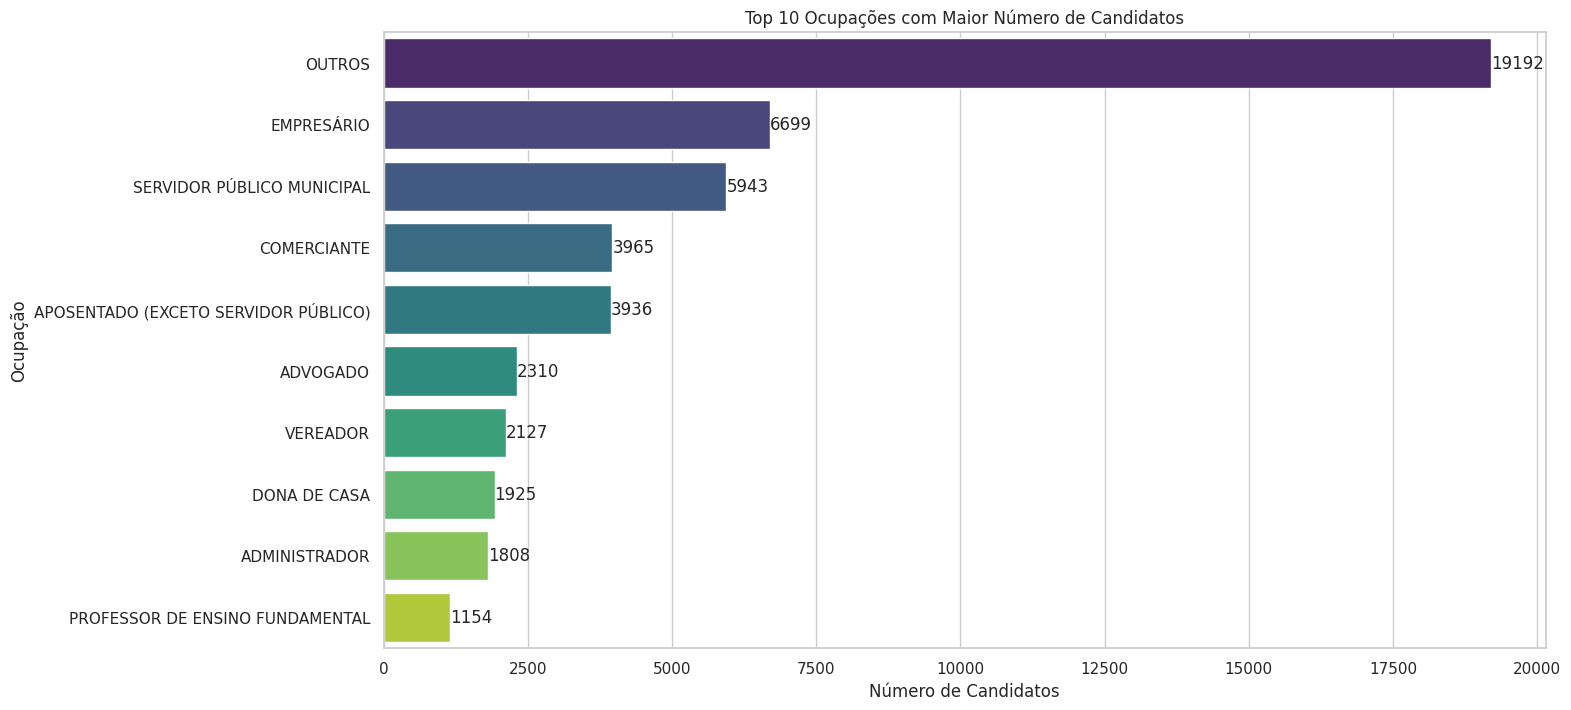

In [42]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Contar o número de candidatos por ocupação
ocupacao_count = eleicao['DS_OCUPACAO'].value_counts()

# Criar o DataFrame para o gráfico
df_ocupacao = ocupacao_count.reset_index()
df_ocupacao.columns = ['Ocupação', 'Número de Candidatos']

# Filtrar as 10 maiores ocupações
df_top_10_ocupacao = df_ocupacao.head(10)

# Criar o gráfico de barras
ax = sns.barplot(x='Número de Candidatos', y='Ocupação', data=df_top_10_ocupacao, hue='Ocupação', dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Ocupações com Maior Número de Candidatos')
plt.xlabel('Número de Candidatos')
plt.ylabel('Ocupação')

# Adicionar rótulos às barras
for index, row in df_ocupacao.iterrows():
    ax.annotate(f"{row['Número de Candidatos']}", xy=(row['Número de Candidatos'], index), ha='left', va='center')

# Mostrar o gráfico
plt.show()

   - **Análise de Correspondência:** Explorar as relações entre variáveis categóricas, como cargo, partido, e gênero.

In [43]:
# Contar o número de candidatos por combinação de cargo, partido e gênero
contagem = eleicao.groupby(['DS_CARGO', 'SG_PARTIDO', 'DS_GENERO']).size().reset_index(name='Número de Candidatos')

print("Tabela de Quantidade de Candidatos por Cargo:")
print(contagem.head(30))  # Exibe as primeiras 30 linhas da tabela de frequências

Tabela de Frequências Cruzadas:
    DS_CARGO SG_PARTIDO  DS_GENERO  Número de Candidatos
0   PREFEITO       AGIR  MASCULINO                    11
1   PREFEITO     AVANTE   FEMININO                     1
2   PREFEITO     AVANTE  MASCULINO                    19
3   PREFEITO  CIDADANIA   FEMININO                     1
4   PREFEITO  CIDADANIA  MASCULINO                    14
5   PREFEITO         DC   FEMININO                     2
6   PREFEITO         DC  MASCULINO                    15
7   PREFEITO        MDB   FEMININO                    27
8   PREFEITO        MDB  MASCULINO                   150
9   PREFEITO   MOBILIZA   FEMININO                     2
10  PREFEITO   MOBILIZA  MASCULINO                    20
11  PREFEITO       NOVO   FEMININO                     5
12  PREFEITO       NOVO  MASCULINO                    38
13  PREFEITO    PC do B  MASCULINO                     1
14  PREFEITO        PCB  MASCULINO                     3
15  PREFEITO        PCO   FEMININO                     4

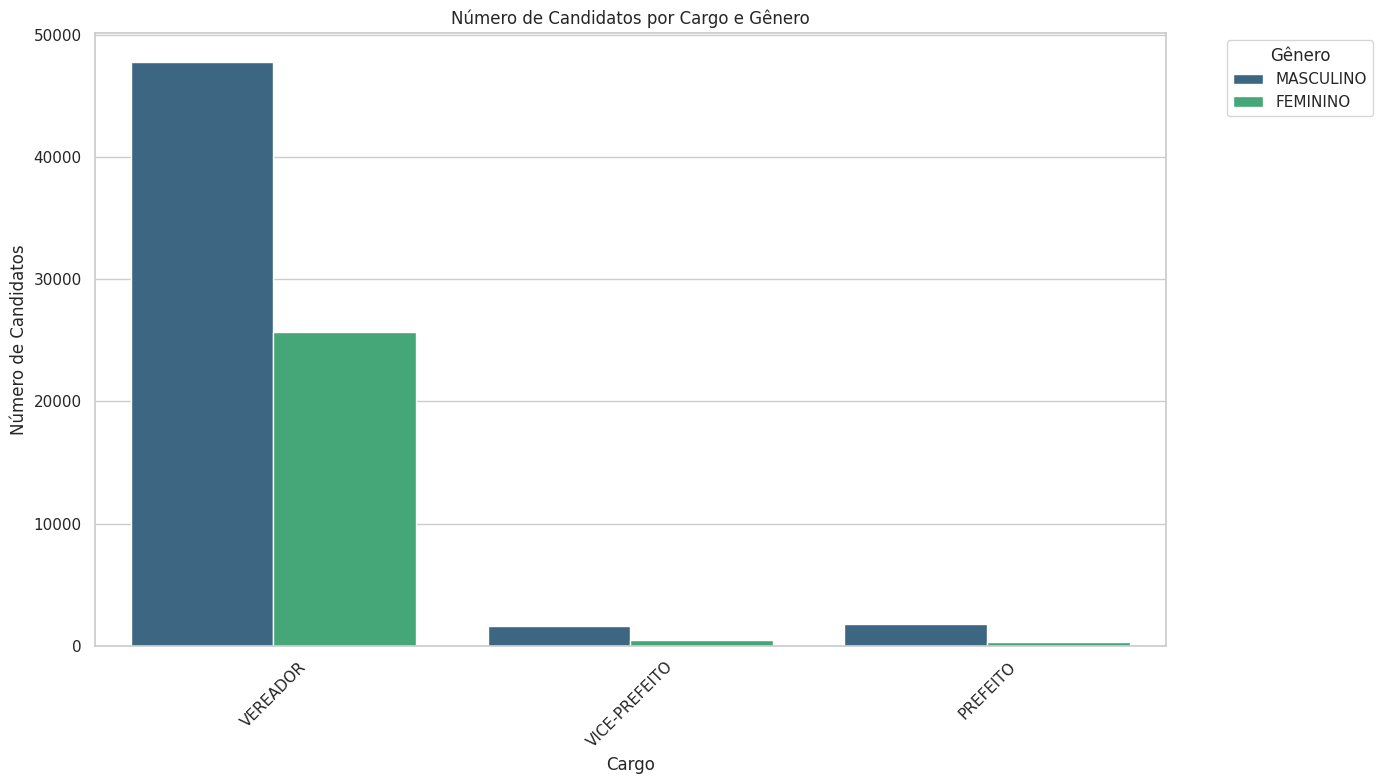

In [44]:
# Gráfico de barras empilhadas para Cargo e Gênero
plt.figure(figsize=(14, 8))
sns.countplot(data=eleicao, x='DS_CARGO', hue='DS_GENERO', palette='viridis')
plt.title('Número de Candidatos por Cargo e Gênero')
plt.xlabel('Cargo')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

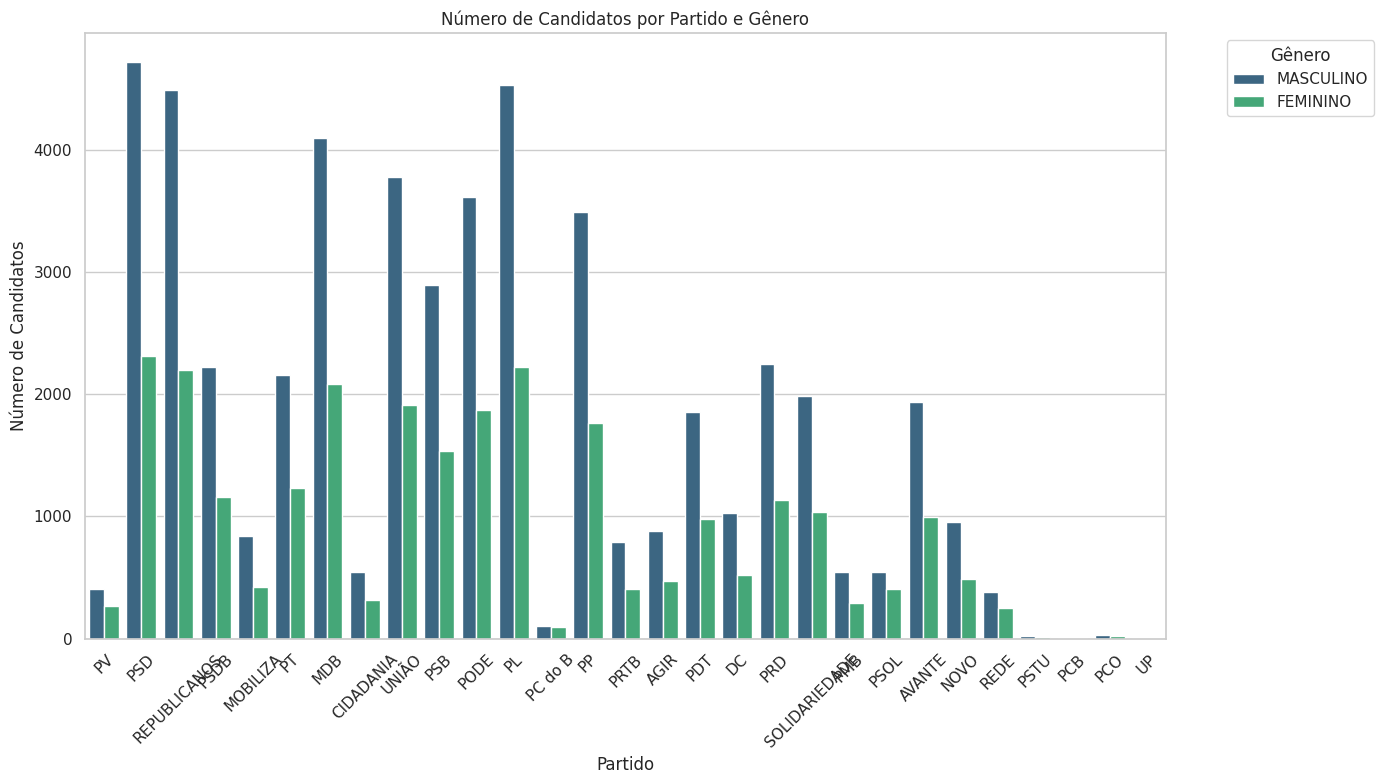

In [45]:
# Gráfico de barras empilhadas para Partido e Gênero
plt.figure(figsize=(14, 8))
sns.countplot(data=eleicao, x='SG_PARTIDO', hue='DS_GENERO', palette='viridis')
plt.title('Número de Candidatos por Partido e Gênero')
plt.xlabel('Partido')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
# Tabela de contingência entre cargo e partido
tabela_contingencia = pd.crosstab(eleicao['DS_CARGO'], eleicao['SG_PARTIDO'])
print("\nTabela de Número de Candidatos por Partido e Cargo:")
print(tabela_contingencia)


Tabela de Número de Candidatos por Partido e Cargo:
SG_PARTIDO     AGIR  AVANTE  CIDADANIA    DC   MDB  MOBILIZA  NOVO  PC do B  PCB  PCO   PDT    PL  \
DS_CARGO                                                                                            
PREFEITO         11      20         15    17   177        22    43        1    3   14    42   289   
VEREADOR       1326    2871        838  1509  5807      1219  1341      192    6   25  2748  6252   
VICE-PREFEITO    20      41         11    26   204        23    56        6    3   13    46   218   

SG_PARTIDO     PMB  PODE    PP   PRD  PRTB   PSB   PSD  PSDB  PSOL  PSTU    PT   PV  REDE  \
DS_CARGO                                                                                    
PREFEITO         7   114   124    25    13    91   399    64    42     5   136   20    10   
VEREADOR       824  5237  4996  3297  1166  4238  6444  3220   862    22  3142  623   613   
VICE-PREFEITO    8   142   142    59    18   109   199   100    49   

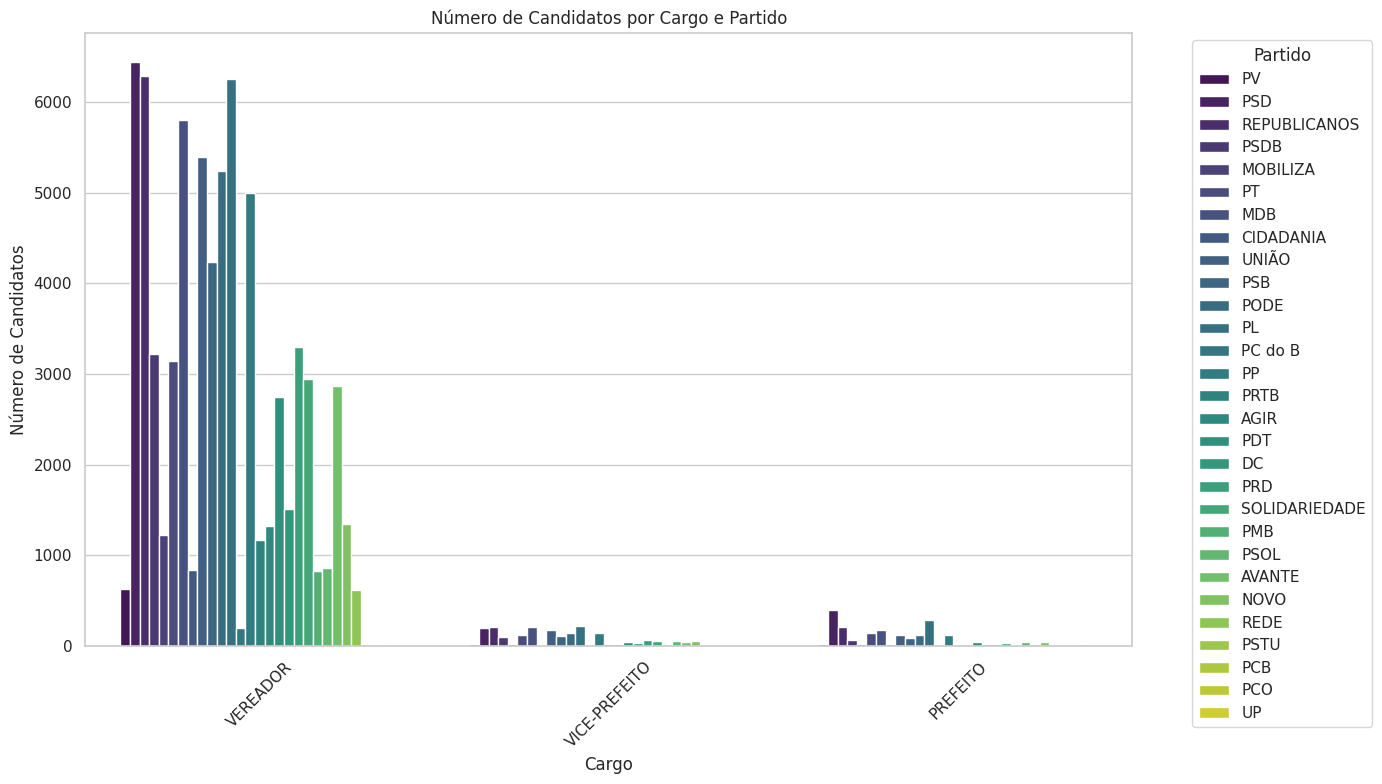

In [47]:
# Gráfico de barras empilhadas para Cargo e Partido
plt.figure(figsize=(14, 8))
sns.countplot(data=eleicao, x='DS_CARGO', hue='SG_PARTIDO', palette='viridis')
plt.title('Número de Candidatos por Cargo e Partido')
plt.xlabel('Cargo')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Despesas de Campanha**

In [49]:
# Calcular o valor máximo das despesas de campanha
valor_maximo = eleicao['VR_DESPESA_MAX_CAMPANHA'].max()

# Calcular o valor mínimo das despesas de campanha
valor_minimo = eleicao['VR_DESPESA_MAX_CAMPANHA'].min()

# Calcular o valor médio das despesas de campanha
valor_medio = eleicao['VR_DESPESA_MAX_CAMPANHA'].mean()

# Calcular a mediana das despesas de campanha
mediana = eleicao['VR_DESPESA_MAX_CAMPANHA'].median()

# Calcular a moda das despesas de campanha
moda = eleicao['VR_DESPESA_MAX_CAMPANHA'].mode()

# Calcular o Desvio Padrão das despesas de campanha
desvio_padrao = eleicao['VR_DESPESA_MAX_CAMPANHA'].std()

# Exibir os resultados
print(f"Valor máximo das despesas de campanha: R$ {valor_maximo}")
print(f"Valor mínimo das despesas de campanha: R$ {valor_minimo}")
print(f"Valor médio das despesas de campanha: R$ {valor_medio:.2f}")
print(f"Mediana das despesas de campanha: R$ {mediana:.2f}")
print(f"Moda das despesas de campanha: R$ {moda[0]:.2f}")
print(f"Desvio padrão das despesas de campanha: R$ {desvio_padrao:.2f}")

Valor máximo das despesas de campanha: R$ 67276114.5
Valor mínimo das despesas de campanha: R$ -1.0
Valor médio das despesas de campanha: R$ 163736.05
Mediana das despesas de campanha: R$ 34314.49
Moda das despesas de campanha: R$ 15985.08
Desvio padrão das despesas de campanha: R$ 951919.00


In [50]:
# Calculo de Quartis
quartis = eleicao['VR_DESPESA_MAX_CAMPANHA'].quantile([0.25, 0.5, 0.75])
print(f"Quartis das despesas de campanha:\n{quartis}")

Quartis das despesas de campanha:
0.25    15985.08
0.50    34314.49
0.75    99823.41
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64


#Hipóteses ✅ ❌

- ***Relação entre Ocupação e Despesas de Campanha***

Hipótese: Ocupações diferentes estão associadas a médias diferentes de despesas de campanha.

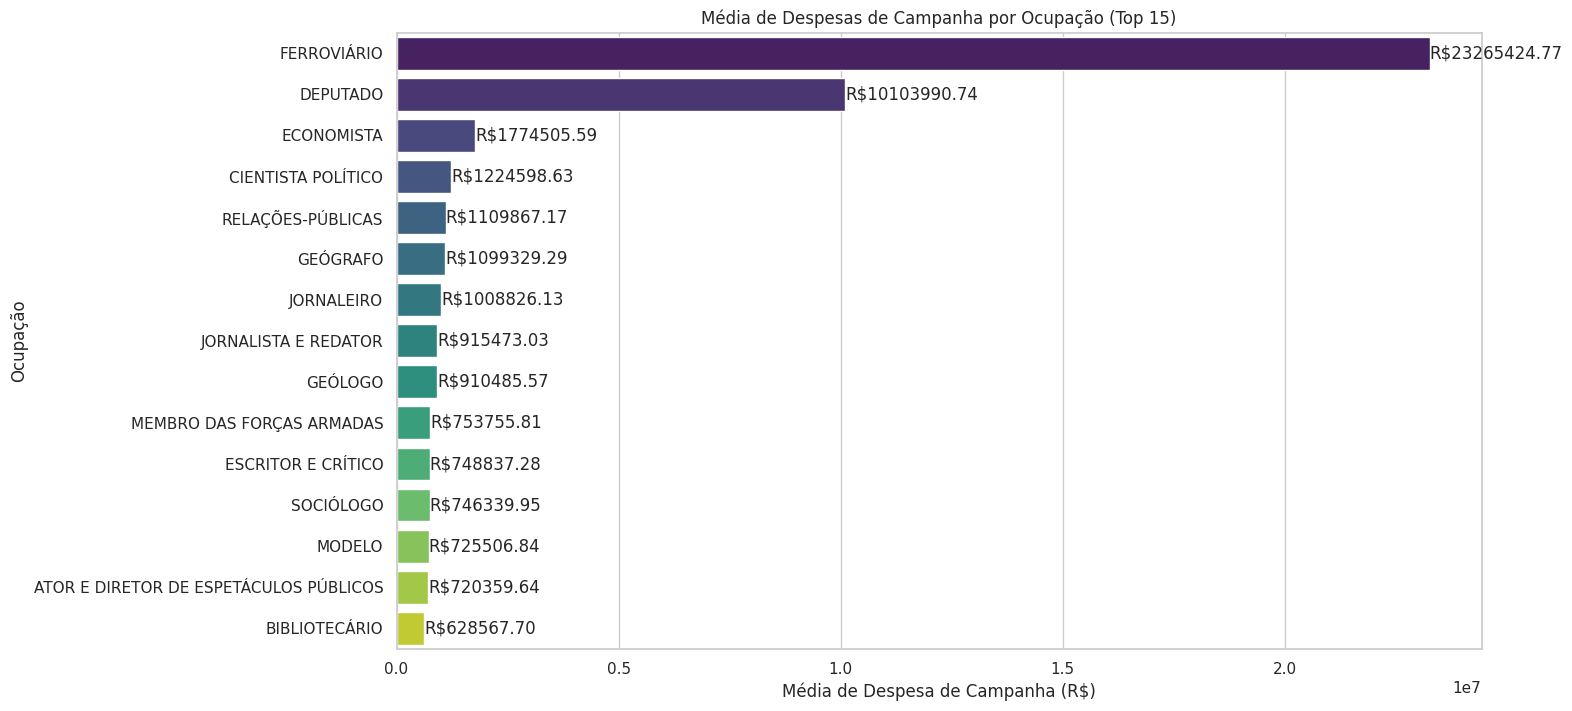

In [51]:
# Calcular a média das despesas por ocupação
despesa_por_ocupacao = eleicao.groupby('DS_OCUPACAO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).head(15)

# Plotar um gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=despesa_por_ocupacao.values, y=despesa_por_ocupacao.index, hue=despesa_por_ocupacao.index, palette='viridis', dodge=False, legend=False)

# Adicionar rótulos às barras
for index, value in enumerate(despesa_por_ocupacao.values):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('Média de Despesas de Campanha por Ocupação (Top 15)')
plt.xlabel('Média de Despesa de Campanha (R$)')
plt.ylabel('Ocupação')

# Mostrar o gráfico
plt.show()

In [52]:
#Análise de Variância: Para comparar as médias das despesas entre diferentes ocupações.
grupos = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('DS_OCUPACAO')]
estatistica, p_valor = f_oneway(*grupos)
print(f'Estatística F: {estatistica}, p-valor: {p_valor}')

Estatística F: 29.7810929212277, p-valor: 0.0


Podemos rejeitar a hipótese nula (que as médias são iguais), ou seja as ocupações/profissoes estão associadas a diferentes médias de despesas de campanha.

 **Conclusão:**
 Sendo assim, após analise podemos concluir que é muito provável que as ocupações estejam associadas a diferentes médias de despesas de campanha, confirmando que há uma relação significativa entre a ocupação e as despesas de campanha dos candidatos. **HIPOTESE COMFIRMADA!** ✅

- ***Diferença nas Despesas de Campanha por Estado Civil***

Hipótese: Existe uma diferença significativa nas despesas de campanha entre diferentes estados civis.

In [53]:
#Média e Mediana das Despesas por Estado Civil:
media_por_estado_civil = eleicao.groupby('DS_ESTADO_CIVIL')['VR_DESPESA_MAX_CAMPANHA'].mean()
mediana_por_estado_civil = eleicao.groupby('DS_ESTADO_CIVIL')['VR_DESPESA_MAX_CAMPANHA'].median()

print("Média das Despesas por Estado Civil:")
print(media_por_estado_civil)
print("\nMediana das Despesas por Estado Civil:")
print(mediana_por_estado_civil)

Média das Despesas por Estado Civil:
DS_ESTADO_CIVIL
CASADO(A)                    155186.367575
DIVORCIADO(A)                197324.107105
SEPARADO(A) JUDICIALMENTE    191788.565643
SOLTEIRO(A)                  167639.739803
VIÚVO(A)                     129166.215284
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

Mediana das Despesas por Estado Civil:
DS_ESTADO_CIVIL
CASADO(A)                    34048.20
DIVORCIADO(A)                39883.88
SEPARADO(A) JUDICIALMENTE    29894.60
SOLTEIRO(A)                  31659.66
VIÚVO(A)                     29462.02
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64


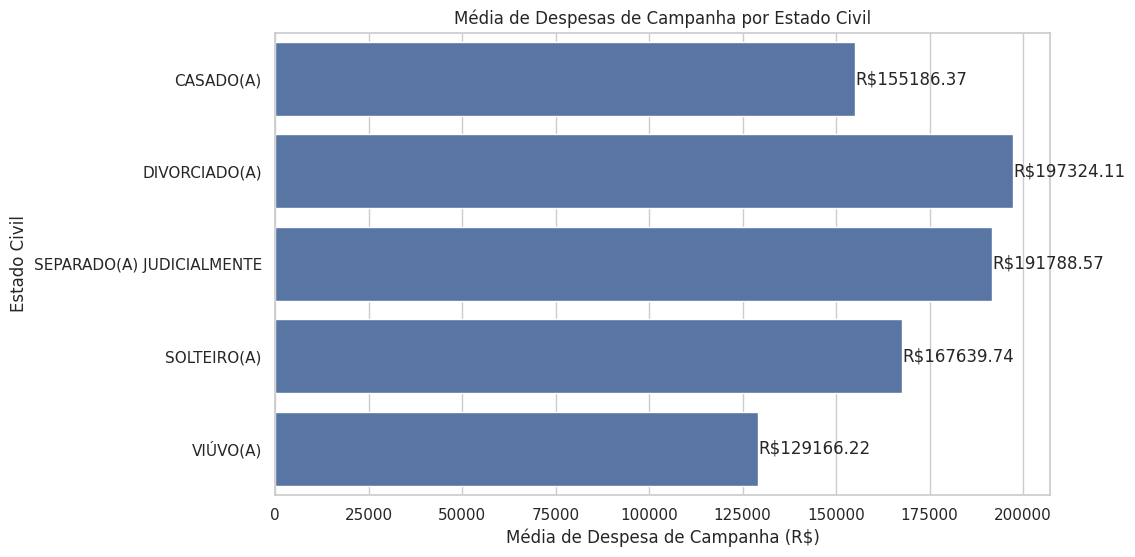

In [54]:
# Calcular a média das despesas por estado civil
despesa_por_estado_civil = eleicao.groupby('DS_ESTADO_CIVIL')['VR_DESPESA_MAX_CAMPANHA'].mean()

# Plotar um gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=despesa_por_estado_civil.values, y=despesa_por_estado_civil.index)

# Adicionar rótulos às barras
for index, value in enumerate(despesa_por_estado_civil.values):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('Média de Despesas de Campanha por Estado Civil')
plt.xlabel('Média de Despesa de Campanha (R$)')
plt.ylabel('Estado Civil')

# Mostrar o gráfico
plt.show()

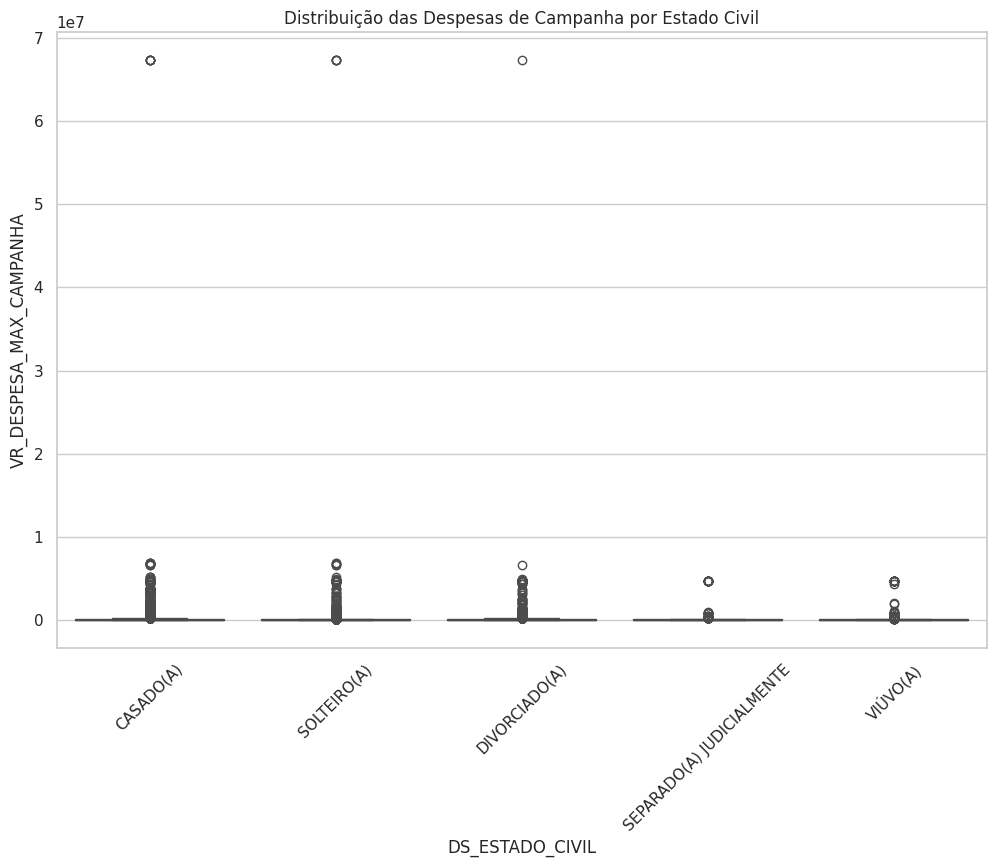

In [55]:
#Boxplot das Despesas por Estado Civil:
plt.figure(figsize=(12, 8))
sns.boxplot(x='DS_ESTADO_CIVIL', y='VR_DESPESA_MAX_CAMPANHA', data=eleicao)
plt.title('Distribuição das Despesas de Campanha por Estado Civil')
plt.xticks(rotation=45)
plt.show()

- Pontos mais acima do grafico indicam os gastos dos prefeitos do estado de SP que utilizaram um valor muito superior aos de outros candidatos, como vereador e vice-prefeito.

In [56]:
#Análise de Variância: Para comparar as médias das despesas entre diferentes ocupações.
grupos = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('DS_ESTADO_CIVIL')]
estatistica, p_valor = f_oneway(*grupos)
print(f'Estatística F: {estatistica}, p-valor: {p_valor}')

Estatística F: 4.58742383349116, p-valor: 0.0010551658165555446


**Conclusão:**
Com base nesses resultados, podemos rejeitar a hipótese nula e concluir que existe uma diferença estatisticamente significativa nas despesas de campanha entre os diferentes estados civis. Em outras palavras, o estado civil dos candidatos está associado a diferentes médias de despesas de campanha. **HIPOTESE COMFIRMADA!** ✅

- ***Impacto da Escolaridade nas Despesas de Campanha***

Hipótese: O nível de escolaridade afeta a média das despesas de campanha.

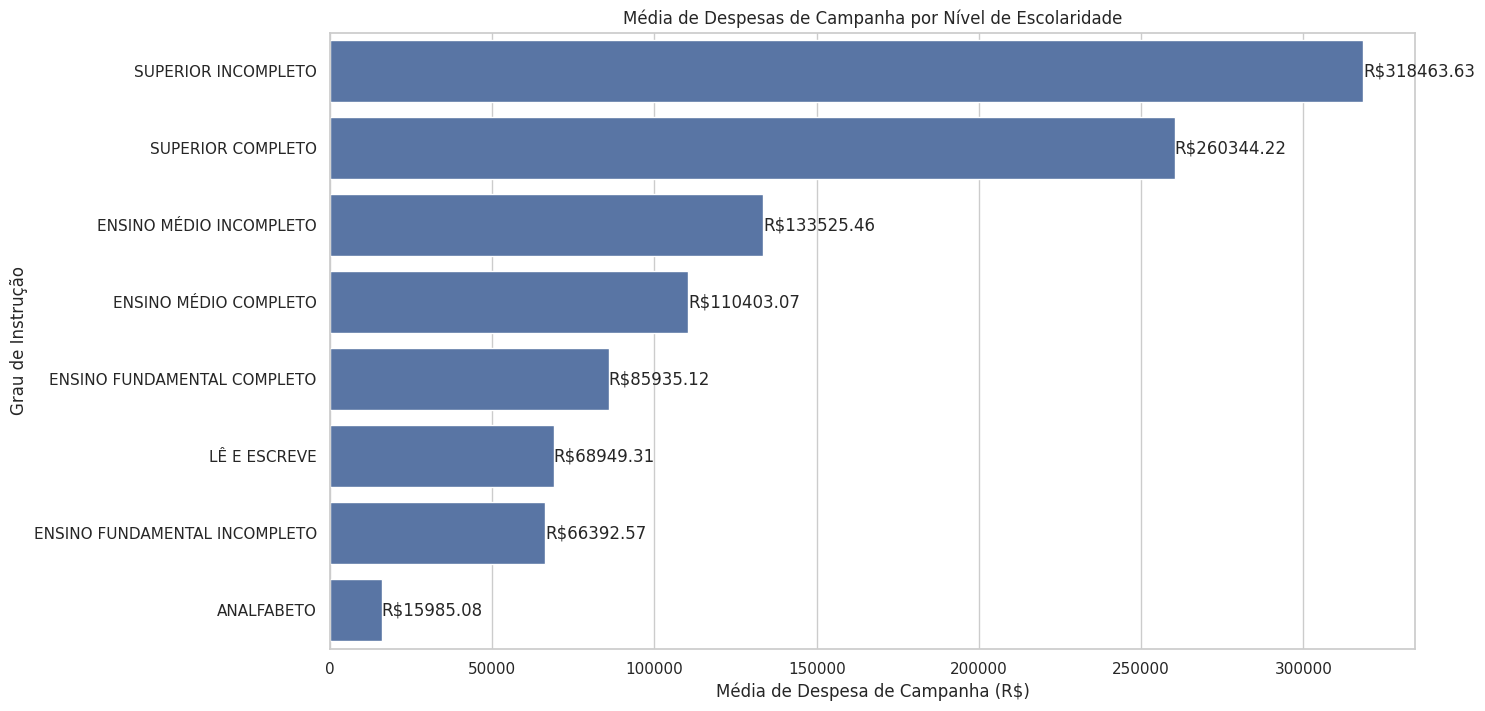

In [57]:
# Calcular a média das despesas por nível de escolaridade
despesa_por_escolaridade = eleicao.groupby('DS_GRAU_INSTRUCAO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False)

# Plotar um gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=despesa_por_escolaridade.values, y=despesa_por_escolaridade.index)

# Adicionar rótulos às barras
for index, value in enumerate(despesa_por_escolaridade.values):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('Média de Despesas de Campanha por Nível de Escolaridade')
plt.xlabel('Média de Despesa de Campanha (R$)')
plt.ylabel('Grau de Instrução')

# Mostrar o gráfico
plt.show()

In [58]:
#Análise de Variância: Para comparar as médias das despesas entre diferentes ocupações.
grupos = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('DS_GRAU_INSTRUCAO')]
estatistica, p_valor = f_oneway(*grupos)
print(f'Estatística F: {estatistica}, p-valor: {p_valor}')

Estatística F: 83.59058978124146, p-valor: 1.1378424602173357e-121


Com base nesses resultados, podemos rejeitar a hipótese nula de que as médias das despesas de campanha entre os diferentes níveis de escolaridade são iguais. Em outras palavras, o nível de escolaridade tem um impacto significativo nas despesas de campanha.

In [59]:
#Teste de Tukey: usei o teste de Tukey para identificar quais grupos diferem entre si.
comparacao = mc.MultiComparison(eleicao['VR_DESPESA_MAX_CAMPANHA'], eleicao['DS_GRAU_INSTRUCAO'])
resultado = comparacao.tukeyhsd()
print(resultado)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
            group1                        group2              meandiff  p-adj      lower        upper     reject
----------------------------------------------------------------------------------------------------------------
                   ANALFABETO   ENSINO FUNDAMENTAL COMPLETO   69950.036    1.0 -2804773.0652 2944673.1372  False
                   ANALFABETO ENSINO FUNDAMENTAL INCOMPLETO  50407.4928    1.0 -2824396.5731 2925211.5586  False
                   ANALFABETO         ENSINO MÉDIO COMPLETO  94417.9868    1.0 -2780169.2845  2969005.258  False
                   ANALFABETO       ENSINO MÉDIO INCOMPLETO 117540.3757    1.0 -2757457.5297 2992538.2811  False
                   ANALFABETO                  LÊ E ESCREVE  52964.2264    1.0 -2822588.2614 2928516.7141  False
                   ANALFABETO             SUPERIOR COMPLETO 244359.1362    1.0 -2630238.1581 311

**Análise do Resultado das interpretações das comparações significativas e não significativas:**

Significativas (**onde "reject" é True**):

*ENSINO FUNDAMENTAL COMPLETO vs. SUPERIOR COMPLETO*

Diferença média: R$174.409,10
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem ensino superior completo comparado a quem tem ensino fundamental completo.

*ENSINO FUNDAMENTAL COMPLETO vs. SUPERIOR INCOMPLETO*

Diferença média: R$232.528,51
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior incompleto comparado a quem tem ensino fundamental completo.

*ENSINO FUNDAMENTAL INCOMPLETO vs. ENSINO MÉDIO COMPLETO*

Diferença média: R$44.010,49
p-valor ajustado: 0.0341
Conclusão: As despesas de campanha são significativamente maiores para quem tem ensino médio completo comparado a quem tem ensino fundamental incompleto.

*ENSINO FUNDAMENTAL INCOMPLETO vs. ENSINO MÉDIO INCOMPLETO*

Diferença média: R$67.132,88
p-valor ajustado: 0.0338
Conclusão: As despesas de campanha são significativamente maiores para quem tem ensino médio incompleto comparado a quem tem ensino fundamental incompleto.

*ENSINO FUNDAMENTAL INCOMPLETO vs. SUPERIOR COMPLETO*

Diferença média: R$193.951,64
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior completo comparado a quem tem ensino fundamental incompleto.

*ENSINO FUNDAMENTAL INCOMPLETO vs. SUPERIOR INCOMPLETO*

Diferença média: R$252.071,06
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior incompleto comparado a quem tem ensino fundamental incompleto.

*ENSINO MÉDIO COMPLETO vs. SUPERIOR COMPLETO*

Diferença média: R$149.941,15
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior completo comparado a quem tem ensino médio completo.

*ENSINO MÉDIO COMPLETO vs. SUPERIOR INCOMPLETO*

Diferença média: R$208.060,56
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior incompleto comparado a quem tem ensino médio completo.

*ENSINO MÉDIO INCOMPLETO vs. SUPERIOR COMPLETO*

Diferença média: R$126.818,76
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior completo comparado a quem tem ensino médio incompleto.

*ENSINO MÉDIO INCOMPLETO vs. SUPERIOR INCOMPLETO*

Diferença média: R$184.938,17
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior incompleto comparado a quem tem ensino médio incompleto.

*LÊ E ESCREVE vs. SUPERIOR COMPLETO*

Diferença média: R$191.394,91
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior completo comparado a quem sabe ler e escrever.

*LÊ E ESCREVE vs. SUPERIOR INCOMPLETO*

Diferença média: R$249.514,32
p-valor ajustado: 0.0
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior incompleto comparado a quem sabe ler e escrever.

*SUPERIOR COMPLETO vs. SUPERIOR INCOMPLETO*

Diferença média: R$58.119,41
p-valor ajustado: 0.0123
Conclusão: As despesas de campanha são significativamente maiores para quem tem superior incompleto comparado a quem tem superior completo.

Não Significativas (**onde "reject" é False**):
Comparações como ANALFABETO vs. ENSINO FUNDAMENTAL COMPLETO, ENSINO MÉDIO COMPLETO vs. ENSINO MÉDIO INCOMPLETO, entre outras, não apresentam diferenças significativas nas despesas de campanha.

**Conclusão:**
O teste de Tukey indica que há diferenças significativas nas despesas de campanha entre vários pares de níveis de escolaridade, com exceção de algumas comparações específicas onde as diferenças não são estatisticamente significativas. Os resultados sugerem que indivíduos com maior nível de escolaridade tendem a ter despesas de campanha significativamente maiores. **HIPOTESE COMFIRMADA!** ✅

- ***Diferença nas Despesas de Campanha por Gênero***

Hipótese: A média das despesas de campanha é diferente entre gêneros.


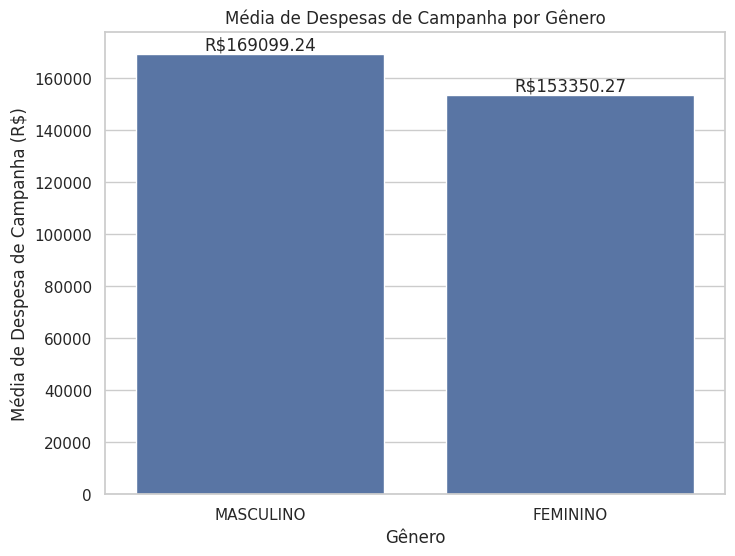

In [60]:
# Calcular a média das despesas por gênero
despesa_por_genero = eleicao.groupby('DS_GENERO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).reset_index()

# Plotar um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='DS_GENERO', y='VR_DESPESA_MAX_CAMPANHA', data=despesa_por_genero)

# Adicionar rótulos às barras
for index, value in enumerate(despesa_por_genero['VR_DESPESA_MAX_CAMPANHA']):
    ax.text(index, value, f"R${value:.2f}", ha='center', va='bottom')

plt.title('Média de Despesas de Campanha por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Despesa de Campanha (R$)')

# Mostrar o gráfico
plt.show()

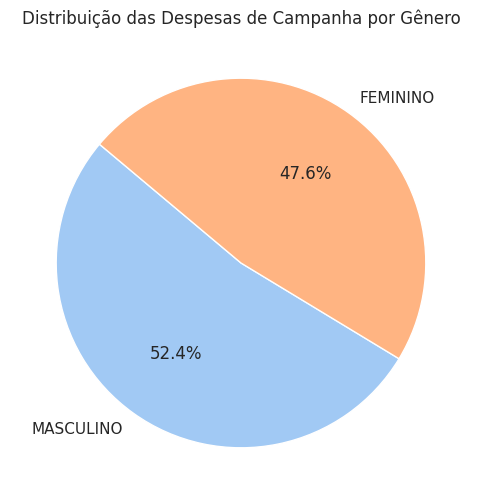

In [61]:
# Calcular a média das despesas por gênero
despesa_por_genero = eleicao.groupby('DS_GENERO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(despesa_por_genero['VR_DESPESA_MAX_CAMPANHA'], labels=despesa_por_genero['DS_GENERO'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição das Despesas de Campanha por Gênero')
plt.show()

Diferenca de apenas 4,8% conforme mostra o gráfico de pizza.

In [62]:
# Filtrar os dados por gênero
genero_feminino = df[eleicao['DS_GENERO'] == 'Feminino']['VR_DESPESA_MAX_CAMPANHA']
genero_masculino = df[eleicao['DS_GENERO'] == 'Masculino']['VR_DESPESA_MAX_CAMPANHA']

# Teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(genero_feminino, genero_masculino, equal_var=False)

# Resultados
f'Estatística t: {t_stat:.4f}'
f'P-Value: {p_value:.4f}'

# Interpretação
alpha = 0.05
if p_value < alpha:
    print("Há uma diferença significativa nas despesas de campanha entre gêneros.")
else:
    print("Não há uma diferença significativa nas despesas de campanha entre gêneros.")

Não há uma diferença significativa nas despesas de campanha entre gêneros.


**Conclusão:**
Após analise podemos concluir que não há uma diferença significativa nas despesas de campanha entre os gêneros masculino e feminino! **HIPOTESE REFULTADA!** ❌

- ***Diferença nas Despesas de Campanha por Partido***

Hipótese: Existem diferenças significativas nas despesas de campanha entre partidos.

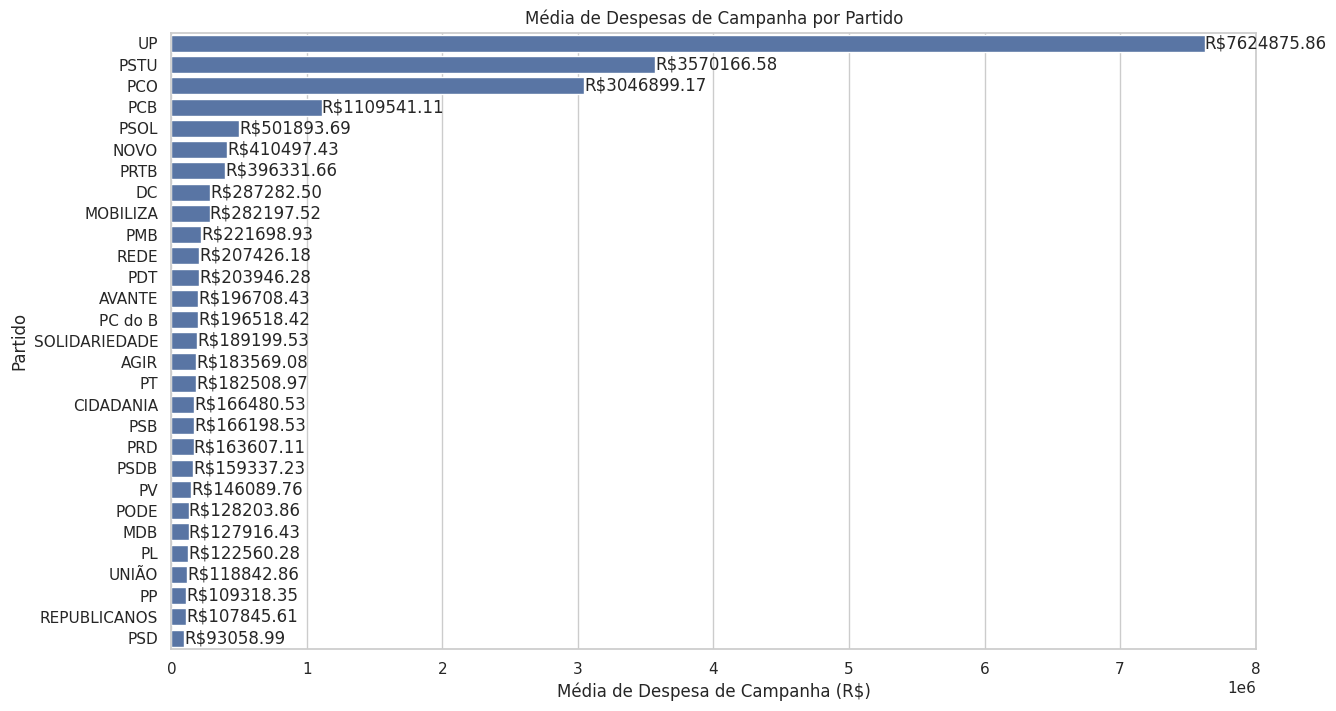

In [63]:
# Calcular a média das despesas por partido
despesa_por_partido = eleicao.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).reset_index()

# Plotar um gráfico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='VR_DESPESA_MAX_CAMPANHA', y='SG_PARTIDO', data=despesa_por_partido)

# Adicionar rótulos às barras
for index, value in enumerate(despesa_por_partido['VR_DESPESA_MAX_CAMPANHA']):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('Média de Despesas de Campanha por Partido')
plt.xlabel('Média de Despesa de Campanha (R$)')
plt.ylabel('Partido')

# Mostrar o gráfico
plt.show()

In [64]:
#Teste de Kruskal-Wallis para testar se há diferenças nas medianas das despesas de campanha entre vários partidos.
grupos_partido = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('SG_PARTIDO')]
estatistica_kw, p_valor_kw = kruskal(*grupos_partido)

print(f'Estatística de Kruskal-Wallis: {estatistica_kw}, p-valor: {p_valor_kw}')

Estatística de Kruskal-Wallis: 4675.781057604523, p-valor: 0.0


**Conclusão:**
Após analise podemos concluir que há uma diferença significativa nas despesas de campanha entre pelo menos dois partidos, conforme mostra o grafico de barras inclinadas acima. **HIPOTESE COMFIRMADA!** ✅

- ***Correlação entre Idade e Despesas de Campanha***

Hipótese: A idade dos candidatos está correlacionada com o valor das despesas de campanha.


In [65]:
# Converter a coluna de data de nascimento para datetime
eleicao['DT_NASCIMENTO'] = pd.to_datetime(eleicao['DT_NASCIMENTO'], format='%d/%m/%Y', errors='coerce')

# Aplicar a função para calcular a idade
eleicao['IDADE'] = eleicao['DT_NASCIMENTO'].apply(calcular_idade)

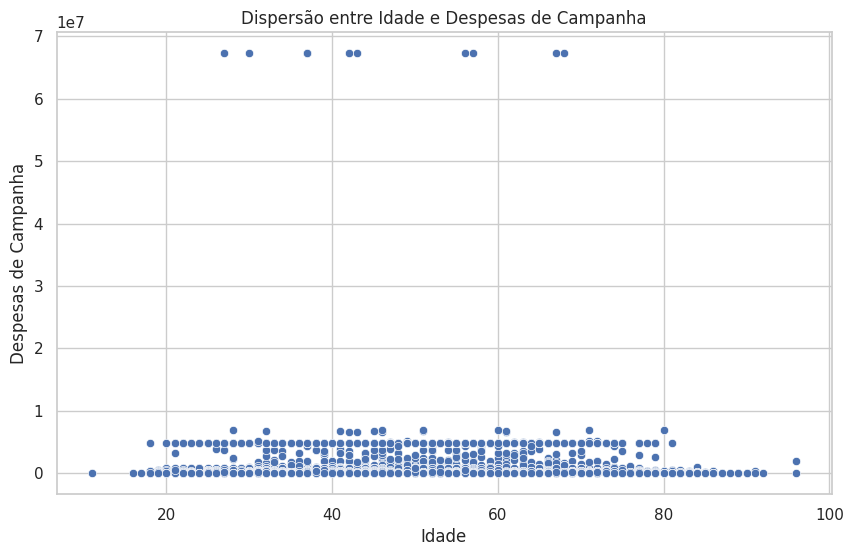

In [66]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDADE', y='VR_DESPESA_MAX_CAMPANHA', data=eleicao)
plt.title('Dispersão entre Idade e Despesas de Campanha')
plt.xlabel('Idade')
plt.ylabel('Despesas de Campanha')
plt.show()

In [67]:
# Calcular a correlação de Pearson entre as variáveis
pearson_corr, pearson_p = stats.pearsonr(eleicao['IDADE'], eleicao['VR_DESPESA_MAX_CAMPANHA'])

# Resultados
print(f"Coeficiente de Correlação de Pearson: {pearson_corr:.4f}, P-Value: {pearson_p:.4f}")

Coeficiente de Correlação de Pearson: 0.0162, P-Value: 0.0000


**Conclusão:**
O coeficiente de correlação de Pearson (0.0162) indica que há uma correlação linear positiva extremamente fraca entre as variáveis. No entanto, o p-valor extremamente baixo (0.0000) sugere que essa relação, apesar de ser fraca, é estatisticamente significativa e não ocorre por acaso. Portanto, você pode concluir que, embora exista uma correlação estatisticamente significativa, ela é tão pequena que não tem um impacto prático ou significativo. **HIPOTESE REFULTADA!** ❌